# Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
#Importing required packages & libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

#printing the head of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#checking the shape of data
df.shape

(7043, 21)

We can see the dataset has 7043 rows and 21 columns.

In [4]:
#checking the type of data
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

These are mostly object type data. Thus, we will have to convert them to numerical values.

In [5]:
#checking null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We can see there are no null values in the dataset. Good for us! We can proceed.

We will now try to visualize the count value of churn in this company as per the data.

<AxesSubplot:>

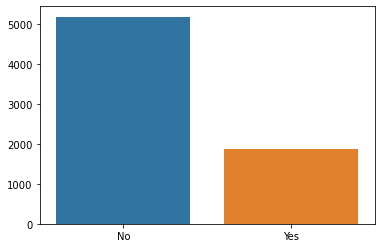

In [6]:
y = df["Churn"].value_counts()

sns.barplot(y.index, y.values)

As per the plot we can see around 2000 customers from the data of 7043 had actually switched to a competitor business. 
Though the number seems almost half from the customers which the company retained, it is essential to find out what factors may influence customer churn and which are the features IBM here should focus on to make sure they retain more customers. 

In [7]:
y_True = df["Churn"][df["Churn"] == False]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["Churn"].shape[0]) * 100 ))

Churn Percentage = 0.0


We can now take a look at the statistical analysis of the data.

In [8]:
df.describe() #checking statistical information

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


So, we see that there is no null value here. The MonthlyCharges column has a mean of 64.76, standard deviation=30.09, min=18.25, max=118.75, 25% percentile of 35.50, 50% percentile of 70.35 and 75% percentile of 89.85.

We will now try to visualize the data using Bivariant analysis. 

<AxesSubplot:xlabel='gender'>

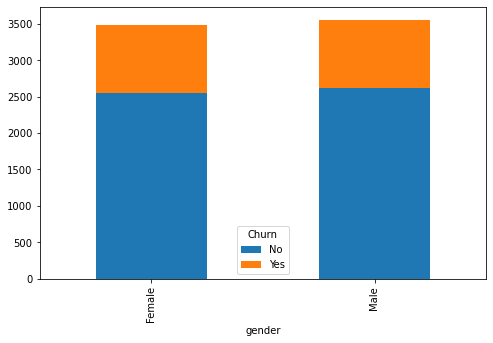

In [9]:
df.groupby(["gender", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(8,5)) 

We can see that the distribution rate in terms of male and female customers whom the company retained and others who left is almost the same.

<AxesSubplot:xlabel='MultipleLines'>

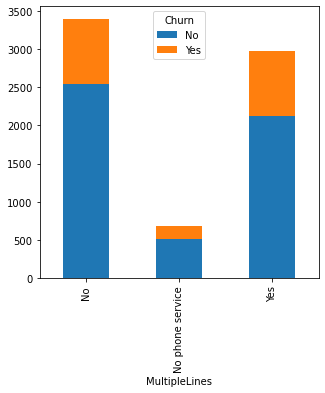

In [10]:
df.groupby(["MultipleLines", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

We can see customers who did not have multiple lines were the most to stay in comparison to customers who had multiple lines and without any phone service. 

<AxesSubplot:xlabel='InternetService'>

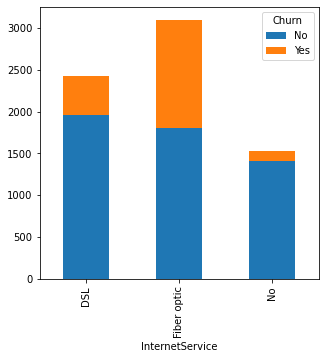

In [11]:
df.groupby(["InternetService", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

We can see rate of churn was higher in customers who fiber optic internet service than DSL or none. 

<AxesSubplot:xlabel='OnlineSecurity'>

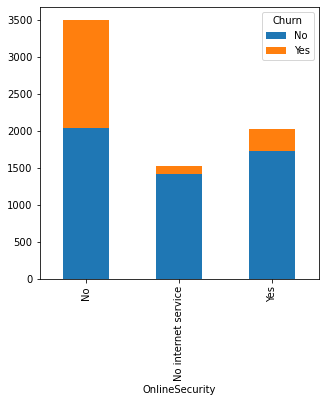

In [12]:
df.groupby(["OnlineSecurity", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

We see customers preferred online security. However there were also customers who did not care about online security while they left. 

<AxesSubplot:xlabel='OnlineBackup'>

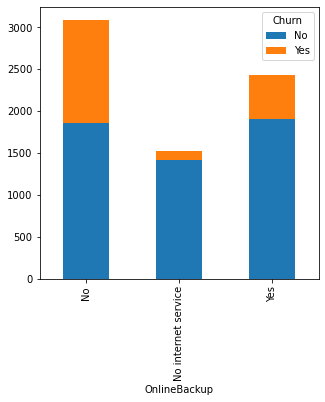

In [13]:
df.groupby(["OnlineBackup", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

Customers who left did not have online backup left more than the ones who had backup and no internet service. 

<AxesSubplot:xlabel='DeviceProtection'>

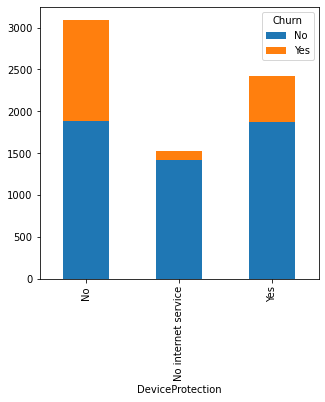

In [14]:
df.groupby(["DeviceProtection", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

Churn was more in customers where they had less device protection than the others with protection and no internet service. 

<AxesSubplot:xlabel='TechSupport'>

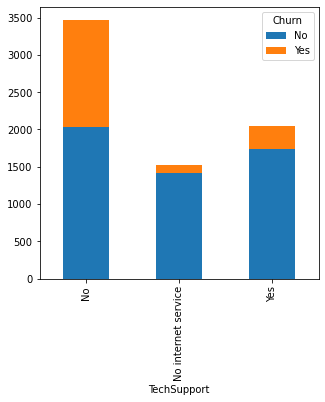

In [15]:
df.groupby(["TechSupport", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

Churn was more in customers with no tech support than the ones who had tech support and no internet service.

<AxesSubplot:xlabel='StreamingTV'>

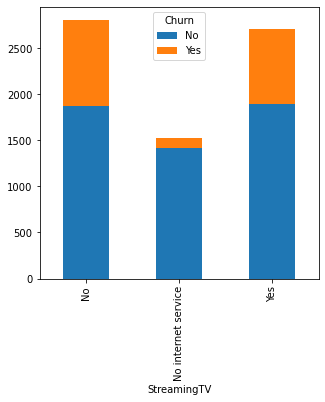

In [16]:
df.groupby(["StreamingTV", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

We can see churn was almost equal for customers who had/had not access to Streaming TV than the ones with no internet.

<AxesSubplot:xlabel='StreamingMovies'>

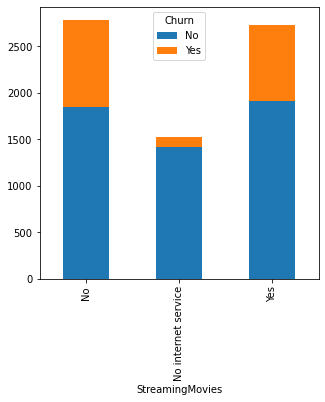

In [17]:
df.groupby(["StreamingMovies", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

We can see churn was almost equal for customers who had/had not access to Streaming Movies than the ones with no internet.

<AxesSubplot:xlabel='Contract'>

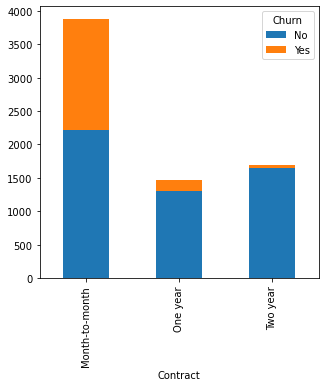

In [18]:
df.groupby(["Contract", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

We can see churn was more with people who had month-to-month contract than the customers who had subscribed for one or two years.

<AxesSubplot:xlabel='PaperlessBilling'>

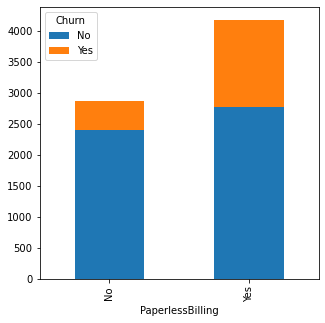

In [19]:
df.groupby(["PaperlessBilling", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

More people who got paperless billing switched to other companies than others. 

<AxesSubplot:xlabel='PaymentMethod'>

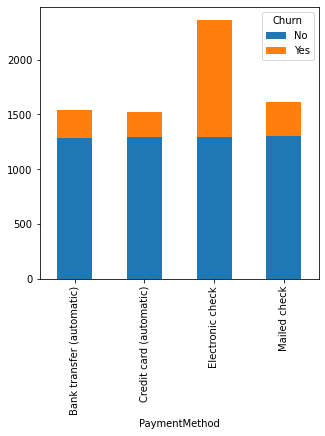

In [20]:
df.groupby(["PaymentMethod", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

More people who preferred Electronic check as Payment Method switched more than other modes of payment like automatic bank transfer, credit card, mailed check.

In [21]:
#Checking the types of column
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We observed that there are certain empty values in the TotalCharges column. We can drop it as this column is not an important one because it gives us the total value/charges that a customer paid to the operator ever month, once or twice a year. 

In [22]:
#df2=df.drop('TotalCharges',inplace=True)
df.drop('TotalCharges', axis=1, inplace=True)

In [23]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

Now the dataset looks good. We can proceed with encoding the data. 

In [24]:
# Discreet value integer encoder
from sklearn import preprocessing 
#le = preprocessing.LabelEncoder()
label_encoder = preprocessing.LabelEncoder()

In [25]:
# State is string and we want discreet integer values
df['DeviceProtection'] = label_encoder.fit_transform(df['DeviceProtection'])
df['MultipleLines'] = label_encoder.fit_transform(df['MultipleLines'])
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'])
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df['InternetService'] = label_encoder.fit_transform(df['InternetService'])
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'])
df['OnlineSecurity'] = label_encoder.fit_transform(df['OnlineSecurity'])
df['StreamingTV'] = label_encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = label_encoder.fit_transform(df['StreamingMovies'])
df['Contract'] = label_encoder.fit_transform(df['Contract'])
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['OnlineBackup'] = label_encoder.fit_transform(df['OnlineBackup'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [26]:
#checking the datatype after applying label encoder
print (df.dtypes)

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int64
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
Churn                 int32
dtype: object


We will now apply transformation technique to change the column MonthlyCharges into integer from float.

In [27]:
df_new = df.copy()                               # Create copy of DataFrame
df_new['MonthlyCharges'] = df_new['MonthlyCharges'].apply(int)          # Transform float to integer
df_new.head(10)     # Print updated pandas DataFrame

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,1
5,9305-CDSKC,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99,1
6,1452-KIOVK,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89,0
7,6713-OKOMC,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29,0
8,7892-POOKP,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104,1
9,6388-TABGU,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56,0


Data looks good. However, the customer id column seems non-relevant for our analysis, so, we will drop it.

Before that we will seperate the target variable Churn from the other variables.

In [28]:
#checking the shape of dataset
df_new.shape

(7043, 20)

In [29]:
#saving our target column in a y to make our analysis easier. 
y = df_new['Churn']
y.size

7043

In [30]:
# now dropping customerID and Churn column
df_new.drop(["customerID","Churn"], axis = 1, inplace=True)

We will save the rest of the data from df_new dataframe in x

In [31]:
X = df_new

#printing the head of the data
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70


The dataset now looks clean. we are good to start building models. 

In [32]:
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier


from sklearn.model_selection import train_test_split

In [33]:
#Using StandardScalar to normalise the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



In [34]:
#splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [35]:
#building models and applying formula
models=[
    LogisticRegression(),
    SVC(),
    MLPClassifier(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(), 
    BaggingClassifier(), 
    GradientBoostingClassifier(), 
    RandomForestClassifier()
       ]

model_names=[
    "LogisticRegression",
    "SVC",
    "MLPClassifier",
    "DecisionTreeClassifier",
    "AdaBoostClassifier",
    "BaggingClassifier",
    "GradientBoostingClassifier",
    "RandomForestClassifier"
    ]

In [36]:
results = []

for i in range(len(models)):
    models[i].fit(X_train,y_train)
    results.append(models[i].score(X_test,y_test))

In [37]:
for i in range(len(models)):
    print(model_names[i] + ": {:.4f}".format(results[i])) 

LogisticRegression: 0.8131
SVC: 0.7998
MLPClassifier: 0.8064
DecisionTreeClassifier: 0.7449
AdaBoostClassifier: 0.8107
BaggingClassifier: 0.7908
GradientBoostingClassifier: 0.8088
RandomForestClassifier: 0.7974


We can see that Logistic Regression offers the highest accuracy of 79.7% followed by Gradient Boosting Classifier, MLP Classifier, AdaBoost , SVC, Random Forest and Decision Tree. 

In [38]:
#Validation function
n_folds = 5

def rmsle_cv(model, features, labels):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(features) # Shuffle the data.
    rmse= np.sqrt(-cross_val_score(model, features, labels, scoring="neg_mean_squared_error", cv = kf))
    return(rmse.mean())

In [39]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': list(range(50, 200, 25)), 'max_features': ['auto', 'sqrt', 'log2'], 
         'min_samples_leaf': list(range(50, 200, 50))}

grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [50, 100, 150],
                         'n_estimators': [50, 75, 100, 125, 150, 175]})

In [40]:
grid_search_cv.best_estimator_

RandomForestClassifier(min_samples_leaf=50, random_state=42)

In [41]:
# Show best parameters.
grid_search_cv.best_params_

{'max_features': 'auto', 'min_samples_leaf': 50, 'n_estimators': 100}

In [42]:
# You can check the results with this functionof grid search.
# RandomSearchCV takes just a sample not all possible combinations like GridSearchCV.
# Mean test score is equivalent to 0.7886
grid_search_cv.cv_results_
df_results = pd.DataFrame(grid_search_cv.cv_results_)
df_results.sort_values(by='mean_test_score', ascending=True).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
53,0.733957,0.023609,0.047251,0.013330,log2,150,175,"{'max_features': 'log2', 'min_samples_leaf': 1...",0.80426,0.787018,0.788032,0.768763,0.774848,0.784584,0.012248,46
32,0.420464,0.018807,0.032766,0.003014,sqrt,150,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.80426,0.790061,0.786004,0.767748,0.774848,0.784584,0.012628,46


In [43]:
#selecting the best model
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [44]:
from joblib import Parallel, delayed
import joblib

#Saving the best model
joblib.dump(lr, 'Customer_Churn_Analysis.pkl')

['Customer_Churn_Analysis.pkl']

In [45]:
# Load the model from the file
lr_from_joblib = joblib.load('Customer_Churn_Analysis.pkl')
  
# Use the loaded model to make predictions
lr_from_joblib.predict(X_test)

array([0, 1, 1, ..., 0, 0, 1])

We have saved the Logistic regression model as it showed highest accuracy. 

The last but the most important part that we will take into account is finding out the features that are most relevant for prediction, here churn analysis. 

In [46]:
from sklearn.feature_selection import mutual_info_classif

In [47]:
mutual_info_classif(X,y)

array([0.        , 0.01424708, 0.00244258, 0.01709561, 0.07143166,
       0.        , 0.00479446, 0.05606431, 0.06181712, 0.04580074,
       0.04507996, 0.06411678, 0.02608819, 0.03063241, 0.09304033,
       0.02491463, 0.03957568, 0.05513408])

In [48]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
gender,0.008226
SeniorCitizen,0.008116
Partner,0.012586
Dependents,0.011120
tenure,0.079835
PhoneService,0.000000
MultipleLines,0.001054
InternetService,0.053062
OnlineSecurity,0.061837
OnlineBackup,0.045879


In [49]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Contract,0.103234
tenure,0.079835
OnlineSecurity,0.061837
TechSupport,0.059470
InternetService,0.053062
PaymentMethod,0.050888
DeviceProtection,0.048891
OnlineBackup,0.045879
StreamingTV,0.041966
MonthlyCharges,0.040933


We can see that contract, online security, tenure, tech support, online backup are the top important features that can impact customer churn than any other. Thus, companies need to put on their efforts on improving these factors so that they can retain more customers in the long run.